In [3]:
# Libraries
import pandas as pd 
import numpy as np 
import sympy as sy
from sympy import *
import warnings

warnings.filterwarnings('ignore')
init_printing(use_unicode=True)

# An Introduction to the Arbitrage Theorem

There are arbitrage opportunities if it is possible to build an investment strategy at zero cost with non-negative values in all possible future states being positive at least one of them.

We use these concepts to obtain a practical definition of a “fair price” for a financial asset. We say that the price of a security is at a “fair” level, or that the security is correctly priced, if there are no-arbitrage opportunities. Arbitrage-free asset prices will be utilized as benchmarks. Deviations from these indicate opportunities for excess profits.

The notion of arbitrage can be used to determine a probability measure under which financial assets behave as martingales, once discounted properly. The tools of martingale arithmetic become available, and one can easily calculate arbitrage-free prices, by evaluating the implied expectations. This approach to pricing derivatives is called the method of equivalent martingale measures.


#### Notation:

Securities such as options, futures, forwards, and stocks will be represented by a vector of asset prices denoted by:
 
$S_t =\begin{equation}\begin{pmatrix}S_1 \\ \vdots \\ \vdots \\ S_n \end{pmatrix}\end{equation}$

The vector $W$ denote all possible states of the world,these states are mutually exclusive, and at least one of them is guaranteed to occur:

$W =\begin{equation}\begin{pmatrix}w_1 & \dots & \dots & w_n \end{pmatrix}\end{equation}$
 
The existence of several assets, along with the assumption of many states of the world, means that for each asset $i$ there are several possible states $j$, for the N assets under consideration, if we multiply $S_t$ by $W$ the payoffs  can be grouped in a matrix D:

 
$$ 
D =\begin{equation}
\begin{pmatrix}
d_{11} & \dots & d_{1j}\\
\vdots & \ddots & \vdots\\
d_{i1} & \dots & d{ij} 
\end{pmatrix}
\end{equation}$$


## Theorem

We consider a case where the market participant is interested only in three assets:

- A risk-free asset such as a Treasury bill $B_t$, whose gross return until next period is $(1 + r\Delta)$. in order to simplify the notation, the amount of risk-free borrowing and lending is selected by the investor. Hence, we can let $B_t = 1 $

- An underlying asset, $S_t$ for example, a stock, that during the small interval  can assume one of only two possible values. 

- A derivative asset, a call option with a premium $C_O$ and a strike K that expires in the "next" period. Given that the underlying asset has two possible values, the call option will assume two possible values as well.

This setup is fairly simple. There are three assets, and two states of the world, the time that elapses was called $\Delta$. In this example we let $\Delta = 1$

Given the $S_t$ and $D$ defined, and given that the two states have positive probabilities of occurrence, if $\psi_1$ and $\psi_2$ positive constants  can be found such that asset prices satisfy


$\begin{equation}\begin{bmatrix} B_t \\ S_t\\ C_T \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}(\Delta r + 1)& (\Delta r + 1)\\ S_1(\Delta + t)   & S_2(\Delta + t)  \\ C_1(\Delta + t) & C_2(\Delta + t) 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 

then there are no-arbitrage possibilities; and if there are no-arbitrage opportunities, then positive constants $\psi_1$, $\psi_2$ satisfying the identity can be found.

This relationship is called a representation. It is not a relation that can be observed in reality, $\psi_1$ and $\psi_2$  are “possible” future values of the underlying asset and they are called state prices. Only one of them, the one that belongs to the state that is realized will be observed. 


Multiplying $D$ by the vector of $\psi_i$ , we get




In [4]:
# Free risk rate
r = sy.Symbol('r') 
# Period
t = sy.Symbol('t')
# Undderlying price in t + 1 given the state 1
S_1 = sy.Symbol('S1_t+1 ') 
# Undderlying price in t + 1 given the state 2
S_2 = sy.Symbol('S2_t+1') 
# Call price in t + 1 given the state 1 
C_1 = sy.Symbol('C1_t+1') 
# Call price in t + 1 given the state 2
C_2 = sy.Symbol('C2_t+1') # Call price in t + 1 given the state 2
# The amount of risk-free borrowing and lending is selected by the investor, in this case we chosee
bono = 1
# The time that elapses Δ. In this particular example we let
Delta = 1
# Pay_of Matrix with  N = 3 assets and K = 2 states of the word 
D_t = Matrix([[(Delta*r+1)*bono, (Delta*r+1)*bono], 
            [S_1,S_2], 
            [C_1 ,C_2 ]]) 
# State of prices
ep = Matrix([['psi_1'],['psi_2']])
D_t*ep

⎡ψ₁⋅(r + 1) + ψ₂⋅(r + 1)⎤
⎢                       ⎥
⎢S_1_t+1 ⋅ψ₁ + S₂ ₜ₊₁⋅ψ₂⎥
⎢                       ⎥
⎣ C₁ ₜ₊₁⋅ψ₁ + C₂ ₜ₊₁⋅ψ₂ ⎦

We set the first equation equal to its value in $t_0$

$$1 = (1 + r)\psi_1 + (1 + r)\psi_2$$

Now we can define two probabilities associated with the two states under consideration:

$$ Q_1 = (1 + r)\psi_1$$
$$ Q_2 = (1 + r)\psi_2$$

$Q_1$ and $Q_2$ do not provide direct information about the true probabilities associated with the two states of the world, they are called risk-adjusted probabilities and only exist if there are no arbitrage opportunities.

Now multiply the right-hand side of the last two equations by $\frac{1 + r}{1 + r}$ 


$$S_{(t)} = \frac{1}{1 + r} [(1 + r)𝑆_{1𝑡+1}𝜓_1 + (1 + r)𝑆_{2𝑡+1}𝜓_{2}]$$


$$C_{(t)} = \frac{1}{1 + r} [(1 + r)𝐶_{1𝑡+1}𝜓_1 + (1 + r)𝐶_{2𝑡+1}𝜓_2 ]$$

Which implies

$$S_{(t)} = \frac{1}{1 + r} [Q_1 𝑆_{1𝑡+1} + Q_2 𝑆_{2𝑡+1}]$$


$$C_{(t)} = \frac{1}{1 + r} [Q_1 𝐶_{1𝑡+1} + Q_2 𝐶_{2𝑡+1}𝜓_2 ]$$


The expression multiplies the term in the brackets by a riskless one-period discount factor, the terms in the brackets are expectations calculated using the risk-adjusted probabilities, the current prices of all assets under consideration become equal to their discounted expected payoffs.




## Exercises

- 1 You are given the price of a nondividend-paying stock $S_t$ and a European call option $C_t$ in a world where there are only two possible states:



$f(x)= \left\{ \begin{array}{lcc}
             320 & if & u & occurs  \\
             \\ 260 & if & d & occurs  
             \end{array}\right.$

The true probabilities of the two states are given by $[P_u = 0.5 ; P_d = 0.5]$

$S_t = 280$

$r = 0.05$

The time is discrete with:

$\Delta = 3$ months

$K = 280$

$T = t + \Delta$

(a)  Find the risk-neutral martingale measure  using the normalization by risk-free borrowing and lending:


$$280 = \frac{1}{(\frac{0.05}{12})3} [Q_1 320  +  Q_2  260 ]$$

In [5]:
# we use sympy to solve the equation 

# Risk free rate 
r = 0.05/12

# Define Q_1 and Q_2
q_1 = sy.Symbol('Q_1')
q_2 = sy.Symbol('Q_2')

# Solve the equation (Q_1 + Q_2 = 1; Q_1 = 1 - Q_2; Q_2 = 1 - Q_1)
Q_1 = sy.solve(1/(1 + (r) * 3) * (q_1 * 320  + (1 - q_1) *  260 ) - 280 ,q_1, set = True)
Q_2 = sy.solve(1/(1 + (r) * 3) * (320 * (1 - q_2) + q_2 * 260 ) - 280 ,q_2, set = True)
Q_1,Q_2

(b)  Calculate the value of the option under the risk-neutral martingale measure using $Q_1$ and $Q_2$


$$C_{(t)} = \frac{1}{1 + r} [Q_1 𝐶_{1𝑡+1} + Q_2 𝐶_{2𝑡+1}𝜓_2 ]$$


In [6]:
# extract values from Q_1 and Q_2
q_1 = float(list(Q_1[1])[0][0])
q_2 = float(list(Q_2[1])[0][0])

# Calculate option price 
C_t = (1/(1 + (r) * 3) * (q_1 * ( 320 - 280 ) + q_2 *  ( 0 ))) 
print('The option price is:',C_t)

The option price is: 15.473251028806601


(c)  Now use the normalization by $S_t$ and find a new measure  under which the normalized variable is a martingale.

$1 =  (\Delta r + 1)\psi_1 + (\Delta r + 1)\psi_2$

$1 =  \frac{S_{1(\Delta + t)}}{S_t}\psi_1 + \frac{S_{2(\Delta + t)}}{S_t}\psi_2$



$1 =  (1.0125)\psi_1 + (1.025)\psi_2$


$1 =  \frac{320}{280}\psi_1 + \frac{260}{280}\psi_2$


In [7]:
psi_1 = sy.Symbol('psi_1')
psi_2 = sy.Symbol('psi_2')
state_p1 = sy.solve((320/280 * psi_1 + 260/280 * psi_2) - 1,psi_1)[0]
state_p2 = sy.solve(((1.0125 *  state_p1) + (1.0125 * psi_2)) - 1,psi_2 , set = True )
state_p1 = sy.solve((320/280 * psi_1 + 260/280 * float(list(state_p2[1])[0][0])) - 1,psi_1,set = True)
state_p1,state_p2

In [8]:
Q_1 = float(list(state_p1[1])[0][0]) * (1 + (r * 3))
Q_2 = float(list(state_p2[1])[0][0]) * (1 + (r * 3))
print(Q_1,Q_2)


0.39166666666666666 0.6083333333333334


(d)  Calculate the option's fair market value using $\psi_1$ 

In [7]:
40 * float(list(state_p1[1])[0][0])

2.  In an economy there are two states of the world and four assets. You are given the following prices for three of these securities in different states of the world:

$\begin{equation}\begin{bmatrix} A \\ B \\ C \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix} 120 + 4 & 70 + 1\\ 80 + 3   & 60 + 1 \\ 90 + 2 & 150 + 10 
\end{bmatrix}
\end{equation}$ 


“Current”  prices for  are 100, 70, and 180, respectively.

(a)  Are the “current”  prices of the three securities arbitrage-free?

We first asume that $r = 0$ for simplicity:

$\psi_i = Q_i$

In [9]:
q_1 = sy.Symbol('Q_1')
q_2 = sy.Symbol('Q_2')
SA_0 = 100
SA_1 = 124
SA_2 = 71
Q_1 = sy.solve(((SA_1 *  ( q_1)) + (SA_2 * (1 - q_1))) - SA_0 ,q_1, set = True )
Q_2 = sy.solve(((SA_1 *  ( 1 - q_2)) + (SA_2 * (q_2))) - SA_0 ,q_2, set = True)

Q_1, Q_2

In [10]:
q_1 = sy.Symbol('Q_1')
q_2 = sy.Symbol('Q_2')
SB_0 = 70
SB_1 = 83
SB_2 = 61
Q_1 = sy.solve(((SB_1 *  ( q_1)) + (SB_2 * (1 - q_1))) - SB_0 ,q_1, set = True )
Q_2 = sy.solve(((SB_1 *  ( 1 - q_2)) + (SB_2 * (q_2))) - SB_0 ,q_2, set = True)

Q_1, Q_2

In [11]:
q_1 = sy.Symbol('Q_1')
q_2 = sy.Symbol('Q_2')
SC_0 = 180
SC_1 = 92
SC_2 = 160
Q_1 = sy.solve(((SC_1 *  ( q_1)) + (SC_2 * (1 - q_1))) - SC_0 ,q_1, set = True )
Q_2 = sy.solve(((SC_1 *  ( 1 - q_2)) + (SC_2 * (q_2))) - SC_0 ,q_2, set = True)

Q_1, Q_2

The prices of securities A and B are free of arbitration, but not that of security C. If we go short with C we can ensure positive returns in all possible states

(c)  Determine a set of arbitrage-free prices for securities , and C.

we only must let 

$\psi_1 = 0.5$ y $ \psi_2 = 0.5$



In [12]:
A = SA_1 * 0.5 + SA_2 * 0.5
B = SB_1 * 0.5 + SB_2 * 0.5
C = SC_1 * 0.5 + SC_2 * 0.5
print("Set of arbitrage free prices: \n","Price A:",A,"Price B:",B,"Price C:",C)

Set of arbitrage free prices: 
 Price A: 97.5 Price B: 72.0 Price C: 126.0


+ d  Suppose we introduce a fourth security, which is a one-period futures contract written on B. What is its price?

$F_0 = Q_1(S_{B1} - K) + Q_2(S_{B2} - K )$


+ e  Suppose a put option with strike price k = 125 is written on C. What is its arbitrage-free price?

$C_0 = Q_1 * (125 - 92) + Q_2 (0)$


In [13]:
k = 125
q_1 = sy.Symbol('Q_1')
C_0 = sy.Symbol('C_0')
sy.solve(((k - SC_1) * ( q_1)) - C_0 ,set = True)


Where 

$0 < Q_1 < 1$ 

3.  Consider a stock  and a plain vanilla, at-the-money put option written on this stock. The option expires at time $t + \Delta$, where $\Delta$ denotes a small interval. At time $t$, there are only two possible ways the $S_t$ can move. It can either go up to  $S_{t+\Delta}^{up}$, or go down to $S_{t+\Delta}^{up}$ . Also available to traders is risk-free borrowing and lending at annual rate r.





(a)  Using the arbitrage theorem, write down a three-equation system with two states that gives the arbitrage-free values of  and .


$\begin{equation}\begin{bmatrix} 1 \\ S_t\\ C_T \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}(\Delta r + 1)& (\Delta r + 1)\\ S_1(\Delta + t)   & S_2(\Delta + t)  \\ C_1(\Delta + t) & C_2(\Delta + t) 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 


(b)  Now plot a two-step binomial tree for $S_t$. Suppose at every node of the tree the markets are arbitrage-free. How many three-equation systems similar to the preceding case could then be written for the entire tree?



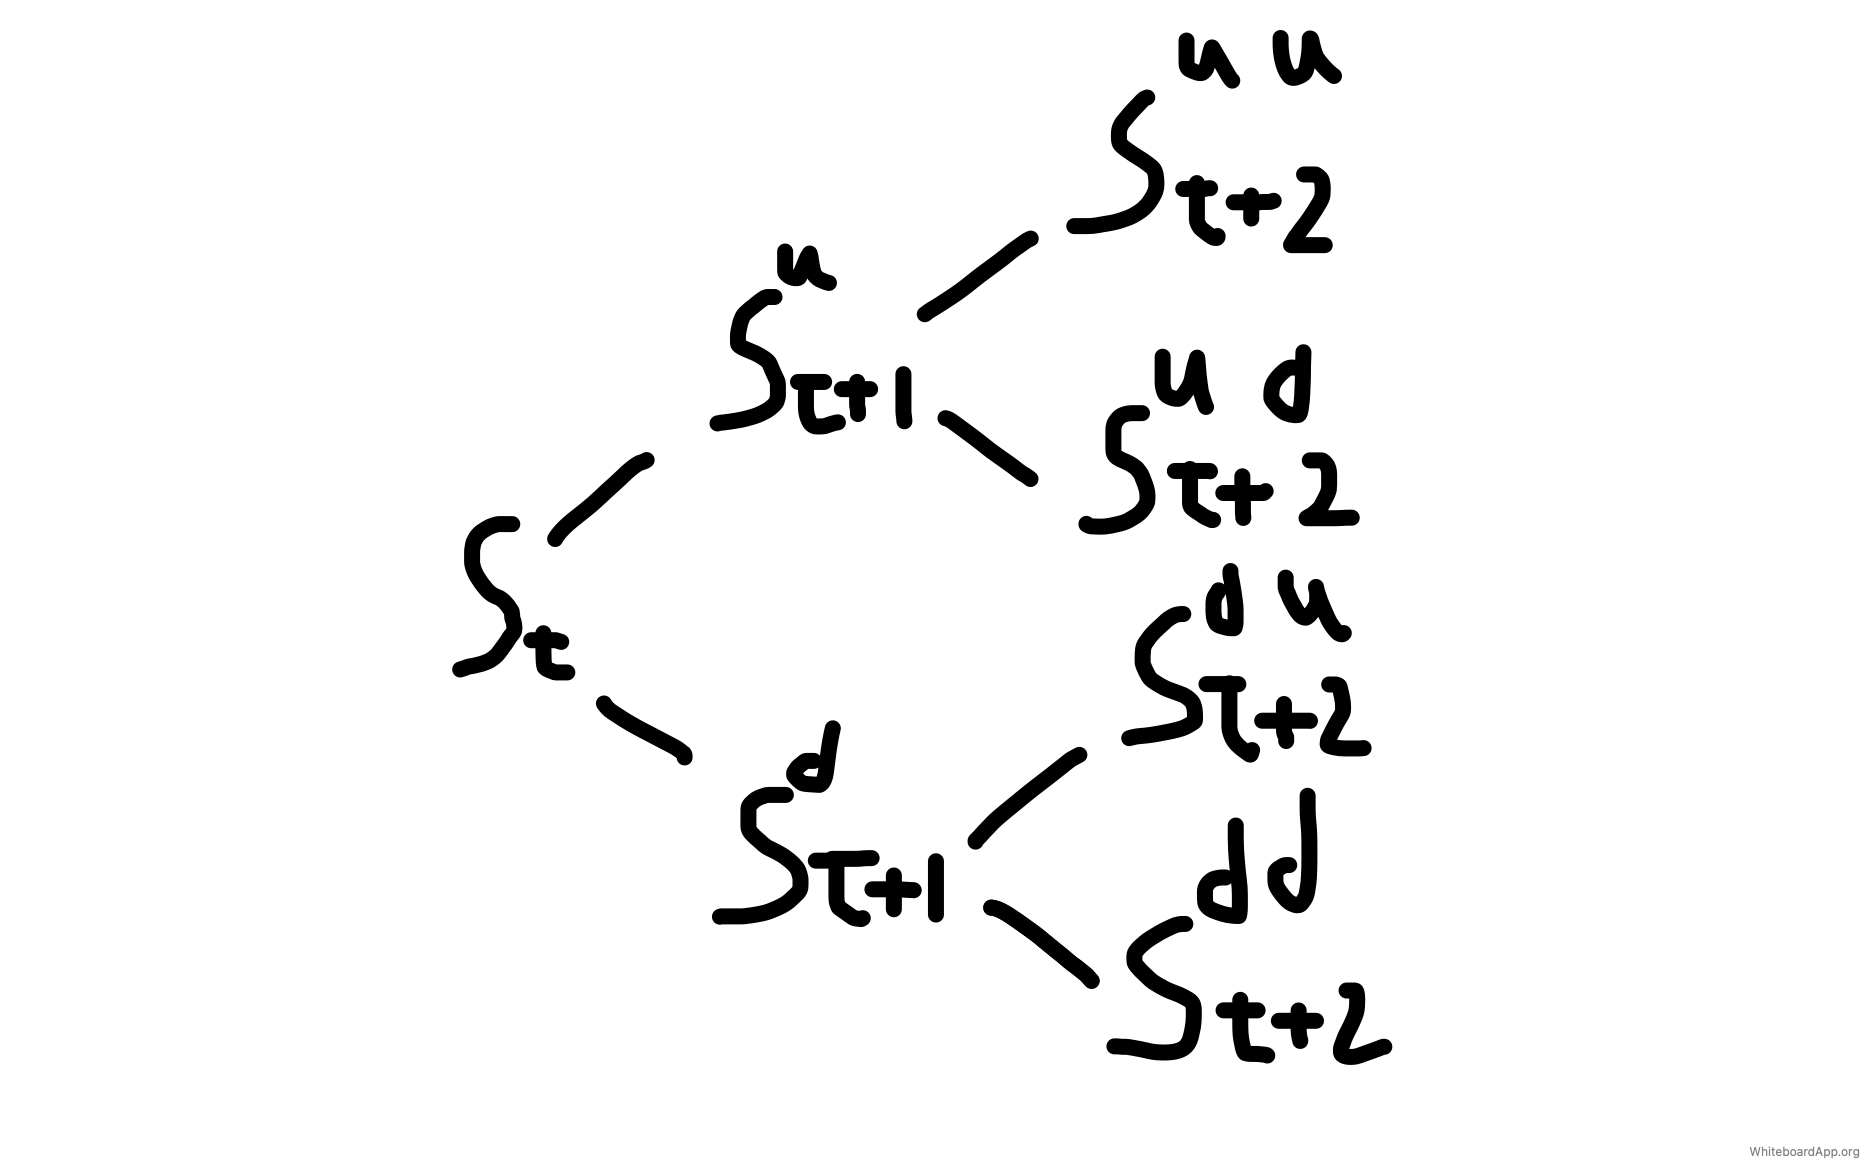

three systems of equations can be written:

$\begin{equation}\begin{bmatrix} 1 \\ S_t\\ C_t \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}(\Delta r + 1)& (\Delta r + 1)\\ S_{t+1}^{u}   & S_{t+1}^{d}  \\ C_{t+1}^{u} & C_{t+1}^{d} 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 

$\begin{equation}\begin{bmatrix} 1 \\ S_{t+1}\\ C_{t+1} \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}(\Delta r + 1)& (\Delta r + 1)\\ S_{t+2}^{uu}   & S_{t+2}^{ud}  \\ C_{t+2}^{uu} & C_{t+2}^{ud} 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 

$\begin{equation}\begin{bmatrix} 1 \\ S_{t+1}\\ C_{t+1} \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}(\Delta r + 1)& (\Delta r + 1)\\ S_{t+2}^{du}   & S_{t+2}^{dd}  \\ C_{t+2}^{du} & C_{t+2}^{dd} 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 


4. A four-step binomial tree for the price of a stock $S_t$ is to be calculated using the up- and downticks given as follows:

$u = 1.15$

$d= \frac{1}{u}$

These up and down movements apply to one-month periods denoted by $\Delta = 1$. 

We have the following dynamics for $S_t$,

$S_{t + \Delta}^{u} = S_{tu}$  

$S_{t + \Delta}^{d} = S_{td}$

where up and down describe the two states of the world at each node. Assume that time is measured in months and that $t_4$ is the expiration date for a European call option $C_t$ written on $S_t$. The stock does not pay any dividends and its price is expected (by “market participants”) to grow at an annual rate of $15$%. The risk-free interest rate r is known to be constant at $5$%.  

(a)  According to the data given above, what is the (approximate) annual volatility of $S_t$ if this process is known to have a log-normal distribution?


$ u = e^{\sigma  \sqrt{\Delta}} $

$ \sigma = \frac{log(u)}{\sqrt{\Delta}}$ 


In [16]:
u = 1.15
Delta = 1
# Annual interval
interval = 12
sigma = np.log(u)/np.sqrt(Delta/interval)
print('The volatility annual is:',sigma)

The volatility annual is: 0.4841495703165768


(b)  Calculate the four-step binomial trees for $S_t$   and $C_t$ 


In [17]:
# we create a binomial tree function to simulate paths of the underlying

def binomial_tree(S0,u,d,T):
    """Create a Binomial tree thats simulate
    paths of the underlying price.
    
    Parameters
    ----------
        S0 float:
            Price of the underlying in t=0.
        
        u float:
            up movements.
       
        d float:
            down movements.
            
        T int:
            Time to maturity
    
    Returns
    -------
        Data Frame:
            With all posible paths.
    """
    z = 1
    S = np.zeros((T + 1 , T + 1 ))
    S[0,0] = S0
    for t in range(1, T + 1 ):
        for i in range(z):
            S[i,t] = S[i, t-1] * u
            S[i + 1, t] = S[i, t-1] * d
        z += 1
    S = pd.DataFrame(S )

    return S

 We assume that $S_0 = 50$

In [18]:
S0 = 50
d = 1/u
T = 4
S =  binomial_tree(S0,u,d,T)
S

,0,1,2,3,4
0,50.0,57.500000,66.125000,76.043750,87.450312
1,0.0,43.478261,50.000000,57.500000,66.125000
2,0.0,0.000000,37.807183,43.478261,50.000000
3,0.0,0.000000,0.000000,32.875812,37.807183
4,0.0,0.000000,0.000000,0.000000,28.587662



$\begin{equation}\begin{bmatrix} 1 \\ 50 \end{bmatrix}\end{equation}$ = $\begin{equation}\begin{bmatrix}1.004& 1.004\\ 57.5  & 43.47 
\end{bmatrix}
\end{equation}$  $\begin{equation}\begin{bmatrix} \psi_1 \\ \psi_2 \end{bmatrix}\end{equation}$ 


$50 = \frac{1}{1.004}[57.5 Q_1 + 43.47 Q_2]$


In [19]:
def risk_neutral_q(r,s,su,sd):
    """Calculate the risk-neutral probability.
    
    Parameters
    ----------
        r float:
            free risk rate.
        
        su float:
            underlaying price given an up movements.
       
        sd float:
            underlaying price given a down movements.
            
    Returns
    -------
        float:
            risk-neutral probability.
    """
    q = sy.solve(((1/(1+r)) * (su * q_1 + sd * (1 - q_1))) - s,q_1)[0]
    return q

In [24]:
r = 0.005/12
q_1 = sy.Symbol('Q_1')
s0 = S[0][0]
s1_u = S[1][0]
s1_d = S[1][1]
Q_1 = risk_neutral_q(r,s0,s1_u,s1_d)

print('The probability Q up is:', Q_1)

The probability Q up is: 0.466602067183461


In [31]:
def pricing_call(S,T,K,Q):
    """Calculate the call price under the
    risk-neutral probability.
    
    Parameters
    ----------
        S float:
            underlaying price .
        
        T int:
           time to maturity.
       
        K float:
            Strike.
            
        Q float:
            risk-neutral probability
            
    Returns
    -------
        Data Frame:
            Data frame with all posible price of the call.
    """
    C = pd.DataFrame(np.zeros((S.shape[0],S.shape[1])))
    C.iloc[:, - 1] = S.iloc[:, - 1] - k
    C[C < 0 ] = 0
    for c in range(T):
        for s in range(len(C.index)-1):
            C.iloc[s,T - c -1] = C.iloc[s, T - c] * Q + C.iloc[s + 1 , T - c] * (1-Q)
    return C


In [32]:
k = 50
C = pricing_call(S,T,k,Q_1)
C 

,0,1,2,3,4
0,5.27020959661279,9.42227260332842,16.1801156467013,26.0754348958333,37.450312
1,0.764339594091792,1.63809731642544,3.51069451173555,7.52395833333331,16.125000
2,0,0,0,0,0.000000
3,0,0,0,0,0.000000
4,0.0,0.0,0.0,0.0,0.000000


 (c)  Calculate the arbitrage-free price  of the option at time $t_0$.


In [33]:
print('The price in t0 for the call is:', C[0][0])

The price in t0 for the call is: 5.27020959661279


5. You are given the following information concerning a stock denoted by $S_t$ 

+ Current value:

$S_0$ = 102

+ Annual volatility:

$ \sigma = 0.3 $

+ Spot rate:

$r = .05$ 

Which is known to be constant during the next 3 months. It is hoped that the dynamic behavior of $S_t$ can be approximated reasonably well by a binomial process if one assumes observation intervals of length 1 month. 

(a)  Consider a European call option written on $S_t$ , $k=120$ and an expiration of 3 months. Using the $S_t$ and the risk-free borrowing and lending $B_t$, construct a portfolio that replicates the option. 


$\Delta = 1$

$r = \frac{0.05}{12}$

$u = e^{\sigma*\sqrt{\frac{\Delta}{12}}}$

In [34]:
Delta = 1
r = 0.05/12
u = np.exp(.30* np.sqrt(Delta/12))
d = 1 /u
S0 = 102
T = 3

In [35]:
S =  binomial_tree(S0,u,d,T)
S

,0,1,2,3
0,102.0,111.227244,121.289214,132.261422
1,0.0,93.538234,102.000000,111.227244
2,0.0,0.000000,85.778443,93.538234
3,0.0,0.000000,0.000000,78.662393


In [36]:
Q = risk_neutral_q(r,S[0][0],S[1][0],S[1][1])
k = 120
C = pricing_call(S,T,k,Q)
C 

,0,1,2,3
0,1.55475326303857,3.09471931601050,6.16000485258407,12.261422
1,0,0,0,0.000000
2,0,0,0,0.000000
3,0.0,0.0,0.0,0.000000



A portfolio replicating the option price must satisfy: 

In $t_0$:
    
$C_t = \theta_t S_t + \theta_t B_t$ 

and in $t_1$ if $S_t$ down:

$0 = \theta_{t+1} S_{t+1} + \theta_{t+1} B_{t+1}$

Where $\theta$ is the position in the respective asset



In [37]:
def hedge_position(C,S,S1,r):
    X = (C - C * r)/(S + (S * r) - S1)
    return X

+ Portfolio in $t_0$

In [38]:
c0 = C.iloc[0,0]

s0 = S.iloc[0,0]
s1 = S.iloc[1,1]
ps = hedge_position(c0,s0,s1,r)
pb = c0 - (ps * s0)
portfolio_value =  round(ps * s0 + pb,2)
print('Security position:' , ps * s0)
print('Risk-free borrowing and lending:' , pb)
print('Portfolio value:',  ps * s0 + pb)
print('Option value:' , c0)
print('Uncovered position:', (ps * s0 + pb) - c0 )

Security position: 17.7707012173676
Risk-free borrowing and lending: -16.2159479543290
Portfolio value: 1.55475326303857
Option value: 1.55475326303857
Uncovered position: -6.66133814775094e-16


+ $t_1$ 


In [39]:
# Loan capitalized at free risk rate
pb1 = pb * (1 + r)

If $S_{t+1}$ down

In [40]:
c1 = C.iloc[1,1]
s1 = S.iloc[1,1]

portfolio_value = round(ps * s1 + pb1,2)
print('Security position:' , ps * s1)
print('Risk-free borrowing and lending:' , pb1)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c1)
print('Uncovered position:', portfolio_value - c1) 

Security position: 16.2964706813307
Risk-free borrowing and lending: -16.2835144041387
Portfolio value: 0.01
Option value: 0
Uncovered position: 0.01


If $S_{t+1}$ up

In [45]:
c1 = C.iloc[0,1]
s1 = S.iloc[0,1]
 
portfolio_value = round(ps * s1 + pb1,2)
print('Security position:' , ps * s1)
print('Risk-free borrowing and lending:' , pb1)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c1)
print('Uncovered position:', portfolio_value - c1) 

Security position: 19.3782953335245
Risk-free borrowing and lending: -16.2835144041387
Portfolio value: 3.09
Option value: 3.09471931601050
Uncovered position: -0.00487556601049910


+ Now we adjust the portfolio for the next period

In [46]:
c1 = C.iloc[0,1]

s1 = S.iloc[0,1]
s2 = S.iloc[1,2]
ps = hedge_position(c1,s1,s2,r)
pb1 = c1 - (ps * s1)
portfolio_value = round(ps * s1 + pb1,2)
print('Security position:' , ps * s1)
print('Risk-free borrowing and lending:' , pb1)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c1)
print('Uncovered position:', portfolio_value - c1 )

Security position: 35.3723858465859
Risk-free borrowing and lending: -32.2776665305754
Portfolio value: 3.09
Option value: 3.09471931601050
Uncovered position: -0.00487556601049910


+ $t_2$

In [47]:
# Loan capitalized at free risk rate
pb2 = pb1 * (1 + r)

If $S_{t+1}$ down

In [48]:
c2 = C.iloc[1,2]
s2 = S.iloc[1,2]

portfolio_value = ps * s2 + pb2
print('Security position:' , ps * s2)
print('Risk-free borrowing and lending:' , pb2)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c2)
print('Uncovered position:', portfolio_value - c2) 

Security position: 32.4379461354195
Risk-free borrowing and lending: -32.4121568077861
Portfolio value: 0.0257893276334187
Option value: 0
Uncovered position: 0.0257893276334187


If $S_{t+1}$ up

In [50]:
c2 = C.iloc[0,2]
s2 = S.iloc[0,2]

portfolio_value = ps * s2 + pb2
print('Security position:' , ps * s2)
print('Risk-free borrowing and lending:' , pb2)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c2)
print('Uncovered position:', portfolio_value - c2) 

Security position: 38.5722843011178
Risk-free borrowing and lending: -32.4121568077861
Portfolio value: 6.16012749333173
Option value: 6.16000485258407
Uncovered position: 0.000122640747659553


+ Now we adjust the portfolio for the next period

In [ ]:
c2 = C.iloc[0,2]

s2 = S.iloc[0,2]
s3 = S.iloc[1,3]
ps = hedge_position(c2,s2,s3,r)
pb2 = c2 - (ps * s2)
portfolio_value = ps * s2 + pb2
print('Security position:' , ps * s2)
print('Risk-free borrowing and lending:' , pb2)
print('Portfolio value:',  portfolio_value)
print('Option value:' , c2)
print('Uncovered position:', portfolio_value - c2 )